# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
#done without bonus

In [2]:
#question?????????? 
#how can I see form summary table that maybe a model is biased? Rsquared high is not an indication that it is actually fitting best the data.


## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here. 
import pandas as pd

student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [4]:
# Your code here.
import seaborn as sns

sns.lmplot('Age','Tardies', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 

#We have a negative correlation. It seems that the hypotesis is true, the older the person, the less minutes late he/she is.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.

#Covariance indicates the direction of the linear relationship between variables. 
print(f"Covariance between student age and tardies is {round(student_data['Age'].cov(student_data['Tardies']), 3)}")


#If COV(xi, xj) = 0 then variables are uncorrelated
#If COV(xi, xj) > 0 then variables positively correlated
#If COV(xi, xj) < 0 then variables negatively correlated

      
#Correlation measures both the strength and direction of the linear relationship between two variables. 
#Correlation values are standardized whereas, covariance values are not.
print(f"Correlation between student age and tardies is {round(student_data['Age'].corr(student_data['Tardies']), 3)}")
      
#in our case variables are negatively correlated

Covariance between student age and tardies is -45.567
Correlation between student age and tardies is -0.939


In [7]:
#Pearson correlation

import scipy.stats as stats

r, p = stats.pearsonr(student_data['Age'], student_data['Tardies'])
print(r, p)

-0.939162688688712 5.566653834553479e-05


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.

import statsmodels.api as sm

X = student_data["Age"] # X our input variables (or independent variables)
y = student_data["Tardies"] # Y our output/dependent variable
X = sm.add_constant(X) # adding an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() # sm.OLS(output, input)
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

#comments:

#outcome variable Tardiest, it's depending on age.
#using linear regression

#We can see that R-squared value is 0.882, meaning that this model explains 88% of the variance in our dependent variable (tardies).

C:\Users\krist\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\krist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           5.57e-05
Time:                        19:49:45   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

In [9]:
# Your code here.

slope, intercept, r_value, p_value, std_err = stats.linregress(student_data['Age'], student_data['Tardies'])

print('Slope: ',slope)
print('Intercept: ',intercept)
print('r: ', r_value)
print('p_val: ', p_value)
print('std_err: ', std_err)

Slope:  -0.2428207709159808
Intercept:  12.888803363135768
r:  -0.9391626886887121
p_val:  5.56665383455343e-05
std_err:  0.03139728816158607


In [10]:
y = intercept + slope * student_data['Age']

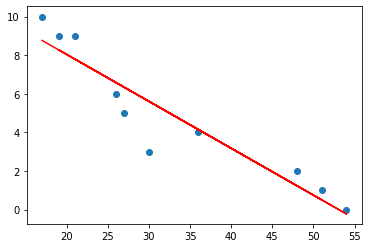

In [11]:
import matplotlib.pyplot as plt
 
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.plot(student_data['Age'], y, c='red')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [12]:
# Your response here. 

#We can see that R-squared value is 0.882, meaning that this model explains 88% of the variance in our dependent variable (tardies).

pvalue= 5.56665383455343e-05
alpha = 0.05

print(pvalue<alpha)

#there is much less than 5% chance that the F-statistic of 59.81 could have occurred by chance under the assumption 
#of a valid Null hypothesis.Thus we reject the Null hypothesis and accept the alternate hypothesis, meaning that
#there is a statistically significant impact on being late when age is changing

True


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [13]:
# Import any libraries you may need & the data

data = pd.read_csv('vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [14]:
data_filter = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

data_filter.isnull().sum() #checking if don't have missing data

Year                       0
Cylinders                  0
Fuel Barrels/Year          0
Combined MPG               0
Fuel Cost/Year             0
CO2 Emission Grams/Mile    0
dtype: int64

In [15]:
# Your response here. 

cor_data = data_filter.corr()
cor_data['CO2 Emission Grams/Mile'].sort_values(ascending = False)

#the srongest correlation is with Fuel Barrels/Year, Fuel Cost/Year and Combined MPG, we will use these fro the model
#the least information, with the smallest correlation Year .

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64

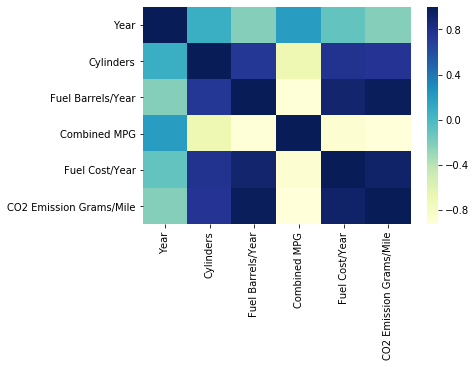

In [16]:
sns.heatmap(data_filter.corr(), cmap="YlGnBu")

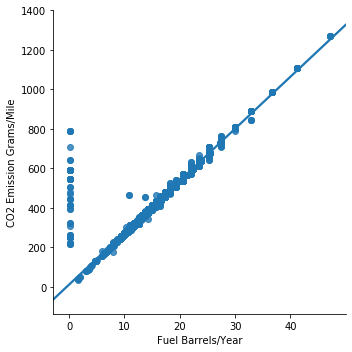

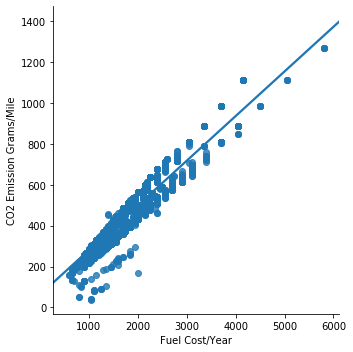

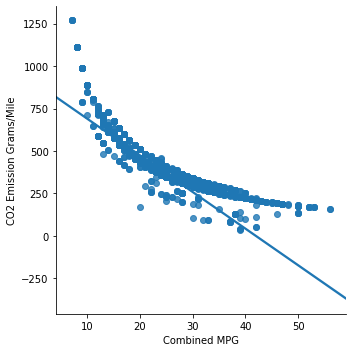

In [17]:
sns.lmplot('Fuel Barrels/Year','CO2 Emission Grams/Mile', data=data_filter)
sns.lmplot('Fuel Cost/Year','CO2 Emission Grams/Mile', data=data_filter)
sns.lmplot('Combined MPG','CO2 Emission Grams/Mile', data=data_filter)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [18]:
#question?????????? 
#how can I see form summary table that maybe a model is biased? Rsquared high is not an indication that it is actually fitting best the data.

# Your response here. 

import statsmodels.api as sm

X = data_filter[["Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]] # X our input variables (or independent variables)
y = data_filter["CO2 Emission Grams/Mile"] # Y our output/dependent variable
X = sm.add_constant(X) # adding an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() # sm.OLS(output, input)
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

#Uisng multiple linear regression

C:\Users\krist\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 5.932e+05
Date:                     Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                             19:50:00   Log-Likelihood:            -1.5235e+05
No. Observations:                    35952   AIC:                         3.047e+05
Df Residuals:                        35948   BIC:                         3.047e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               131.6742      1.691     77.861      0.000     128.359     134.989
Fuel Barrels/Year    19.6955      0.059    331.484      0.000      19.579      19.812
Combined MPG         -3.1661      0.043    -73.626      0.000      -3.250      -3.082
Fuel Cost/Year        0.0317      0.000     70.466      0.000       0.031       0.033
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [19]:
# Your response here. 

#R-squared value — 0.980, meaning that this model explains 98% of the variance in our dependent variable (CO2 Emission Grams/Mile). 
#With 'Fuel Barrels/Year' alone we already explain 97.3% of the variance, adding other variables slightly increased R².
#We can see that all 3 variables are statistically significant in predicting the CO2 Emission Grams/Mile (pvalues are < 0.05) 

#We see that:
#as Fuel Barrels/Year increases by 1, CO2 Emission Grams/Mile will increase by 19.6955
#As Combined MPG increases by 1, CO2 Emission Grams/Mile will decrease by -3.1661
#As Fuel Cost/Year increases by 1, CO2 Emission Grams/Mile will increase by 0.0317

#From the comments above we can state that the most impactful variable is Fuel Barrels/Year

In [34]:
#visualizing model, to investigate errors visually

from sklearn.linear_model import LinearRegression

x = data_filter[["Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = data_filter['CO2 Emission Grams/Mile']

linear_regress = LinearRegression()
linear_regress.fit(x,y)

y_pred = linear_regress.predict(x)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(df.head(10))


       Actual   Predicted
0  522.764706  521.461524
1  683.615385  670.621392
2  555.437500  553.243725
3  683.615385  670.621392
4  555.437500  567.491154
5  403.954545  404.594690
6  370.291667  370.506221
7  444.350000  445.184253
8  403.954545  404.594690
9  370.291667  370.506221


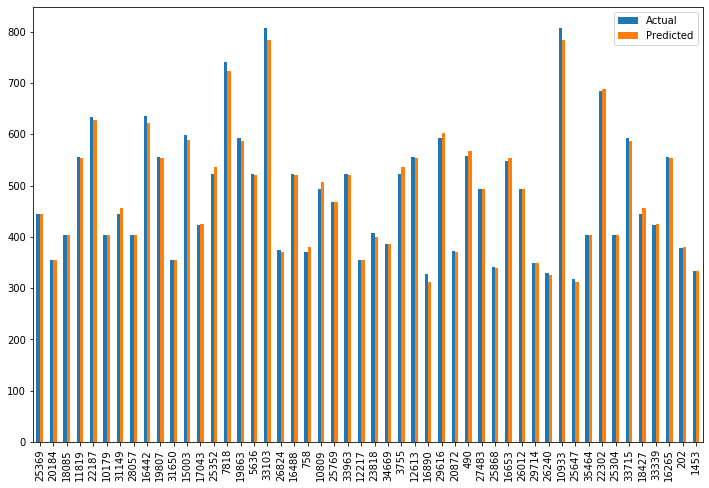

In [38]:
df.sample(n = 50).plot(kind='bar',figsize=(12,8)) #plotting random 50 rows (to check a bit visually the fitting)

#from this random sample we can see that there is a higher error between actual and predicted when CO2 value is higher

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [20]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [21]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [22]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [23]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [24]:
# Your response here. 